In [1]:
'''
@2021/07/11 
Author: Ming Che Lee
mail: leemc@mail.mcu.edu.tw
This program performs GRU+attention operation on time series data. Import a csv file, the first column is the date, 
others are attributes, and the last column is the label.
This program outputs three categories of softmax
'''


import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import keras
from attention import Attention
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import h5py

SEQ_LEN = 10  # 序列長度
Epochs = 100 #圈數
Batch_size = 32 #批次大小

FileName = '12BIAS.csv'
dataset_train = pd.read_csv(FileName) #讀入檔案, 第0欄為日期, 之後是屬性, 最後一欄為標籤

dataset_train = pd.read_csv(FileName) #讀入檔案, 第0欄為日期, 之後是屬性, 最後一欄為標籤

#第0欄日期不讀,其它到標籤之前為屬性
training_set = dataset_train.iloc[:, 1:len(dataset_train.columns)-1].values 

#最後一個欄位為標籤
y1=training_set_y = dataset_train.iloc[:, len(dataset_train.columns)-1:len(dataset_train.columns)].values

print('屬性欄位數量:',len(dataset_train.columns)) #檢查看看有幾個欄位

encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y1)

training_set_y = keras.utils.to_categorical(encoded_Y) #把標籤 1,2,3 轉為二進制 1-(1,0,0) 2-(0,1,0) 3-(0,0,1)
#print(convert_to_one_hot(encoded_Y[0],3))
print('印出第三筆標籤: ',training_set_y[2])
print('印出某筆屬性:\n ',training_set[0:1])


C:\Users\user\Anaconda3\envs\gpu-3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\gpu-3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\gpu-3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\gpu-3.6\lib\site-packages\tensorflow\pyth

屬性欄位數量: 9
印出第三筆標籤:  [0. 1. 0.]
印出某筆屬性:
  [[1.4250000e+02 1.4350000e+02 1.3900000e+02 1.3950000e+02 4.3800291e+07
  0.0000000e+00 0.0000000e+00]]


Using TensorFlow backend.
C:\Users\user\Anaconda3\envs\gpu-3.6\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [2]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

#正規化成0-1; training_set_scaled是屬性, training_set_scaled_y是標籤
#training_set_scaled = training_set
training_set_scaled = sc.fit_transform(training_set)
#training_set_scaled_y = sc.fit_transform(training_set_y)

X_train = []
y_train = []

print('training_set_y shape:',np.shape(training_set_y))

for i in range(SEQ_LEN, len(dataset_train)):
    X_train.append(training_set_scaled[i-SEQ_LEN:i])
    #y_train.append(training_set_y[i:]) 
X_train = np.array(X_train)
#print("t1",X_train[0:1])

#y有時間差,要從SEQ_LEN開始往後取
y_train = training_set_y[SEQ_LEN:len(dataset_train)]

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('X_train_shape=',np.shape(X_train))

#y_train = np.reshape(y_train, (X_train.shape[0], 1))

print('y_train_shape=',np.shape(y_train))

print(X_train.shape[2])
print(training_set_scaled[2:4])
print(y_train[2:4])
print(len(X_train[0]))
print(X_train.shape)
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])
print(X_train[:1:1])

training_set_y shape: (1300, 3)
X_train_shape= (1290, 10, 7)
y_train_shape= (1290, 3)
7
[[0.01405811 0.01096892 0.00849858 0.00738689 0.32393584 0.
  0.50768639]
 [0.00749766 0.00548446 0.         0.00277008 0.38167066 0.
  0.50768639]]
[[0. 1. 0.]
 [0. 1. 0.]]
10
(1290, 10, 7)
1290
10
7
[[[0.02249297 0.02102377 0.01605288 0.01477378 0.26336692 0.
   0.50768639]
  [0.01593252 0.01462523 0.01227573 0.01200369 0.27961286 0.
   0.50768639]
  [0.01405811 0.01096892 0.00849858 0.00738689 0.32393584 0.
   0.50768639]
  [0.00749766 0.00548446 0.         0.00277008 0.38167066 0.
   0.50768639]
  [0.00281162 0.00548446 0.00283286 0.00461681 0.3165281  0.
   0.50768639]
  [0.00468604 0.00457038 0.         0.00277008 0.29184418 0.
   0.50768639]
  [0.00468604 0.00365631 0.00188857 0.00277008 0.21125179 0.
   0.50768639]
  [0.00562324 0.00639854 0.00472144 0.00369344 0.302071   0.
   0.50768639]
  [0.         0.         0.         0.         0.23750034 0.
   0.50768639]
  [0.0131209  0.01096892 0.

In [3]:
'''
##位移資料, 位移長度為SEQ_LEN ###
###這個檔案不需要,上一段迴圈即給定
def buildTrain(train, pastDay=SEQ_LEN, futureDay=1):
  X_train, Y_train = [], []
  for i in range(train.shape[0]-futureDay-pastDay):
    X_train.append(np.array(train[i:i+pastDay]))
  
  #最後幾筆缺的資料補相同數據  
  for i in range(pastDay+1):
    X_train.append(np.array(train[len(X_train)-SEQ_LEN:len(X_train)]))
    
  return np.array(X_train)
'''

'\n##位移資料, 位移長度為SEQ_LEN ###\n###這個檔案不需要,上一段迴圈即給定\ndef buildTrain(train, pastDay=SEQ_LEN, futureDay=1):\n  X_train, Y_train = [], []\n  for i in range(train.shape[0]-futureDay-pastDay):\n    X_train.append(np.array(train[i:i+pastDay]))\n  \n  #最後幾筆缺的資料補相同數據  \n  for i in range(pastDay+1):\n    X_train.append(np.array(train[len(X_train)-SEQ_LEN:len(X_train)]))\n    \n  return np.array(X_train)\n'

In [4]:
print(np.shape(X_train))
#X_train = buildTrain(X_train, SEQ_LEN, 1)
print(np.shape(X_train))
print(X_train[0:1])

(1290, 10, 7)
(1290, 10, 7)
[[[0.02249297 0.02102377 0.01605288 0.01477378 0.26336692 0.
   0.50768639]
  [0.01593252 0.01462523 0.01227573 0.01200369 0.27961286 0.
   0.50768639]
  [0.01405811 0.01096892 0.00849858 0.00738689 0.32393584 0.
   0.50768639]
  [0.00749766 0.00548446 0.         0.00277008 0.38167066 0.
   0.50768639]
  [0.00281162 0.00548446 0.00283286 0.00461681 0.3165281  0.
   0.50768639]
  [0.00468604 0.00457038 0.         0.00277008 0.29184418 0.
   0.50768639]
  [0.00468604 0.00365631 0.00188857 0.00277008 0.21125179 0.
   0.50768639]
  [0.00562324 0.00639854 0.00472144 0.00369344 0.302071   0.
   0.50768639]
  [0.         0.         0.         0.         0.23750034 0.
   0.50768639]
  [0.0131209  0.01096892 0.00944287 0.01015697 0.47892379 0.
   0.50768639]]]


In [5]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0, shuffle=False)

print('np.shape(X_train)=', np.shape(X_train))
print('np.shape(X_val)=', np.shape(X_val))
print('np.shape(X_test)=', np.shape(X_test))
print('np.shape(y_train)=', np.shape(y_train))
print('np.shape(y_val)=', np.shape(y_val))
print('np.shape(y_test)=', np.shape(y_test))

np.shape(X_train)= (928, 10, 7)
np.shape(X_val)= (104, 10, 7)
np.shape(X_test)= (258, 10, 7)
np.shape(y_train)= (928, 3)
np.shape(y_val)= (104, 3)
np.shape(y_test)= (258, 3)


In [6]:
#利用上面的函式切割; 輸入; 以下函式呼叫不能合併到上一個函式宣告cell
print('np.shape(X_train)=', np.shape(X_train))
print('np.shape(y_train)=', np.shape(y_train))
print('nn')

# for lstm_attention version, X_train重新給
#X_train, X_val, X_test = split_data_3dx(training_set_scaled)
#y_train, y_val, y_test = split_data(y_train)

print('np.shape(X_train)=', np.shape(X_train))
print('np.shape(X_val)=', np.shape(X_val))
print('np.shape(X_test)=', np.shape(X_test))
print('np.shape(y_train)=', np.shape(y_train))
print('np.shape(y_val)=', np.shape(y_val))
print('np.shape(y_test)=', np.shape(y_test))
print(len(X_train))



np.shape(X_train)= (928, 10, 7)
np.shape(y_train)= (928, 3)
nn
np.shape(X_train)= (928, 10, 7)
np.shape(X_val)= (104, 10, 7)
np.shape(X_test)= (258, 10, 7)
np.shape(y_train)= (928, 3)
np.shape(y_val)= (104, 3)
np.shape(y_test)= (258, 3)
928


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.models
from keras.models import Sequential

input_dim, output_dim = X_train.shape[2], 3
model_input = Input(shape=(SEQ_LEN, input_dim))
x = tf.keras.layers.GRU(128, return_sequences=True)(model_input)
x = Attention(32)(x)
x = Dense(3, activation='softmax')(x)
model = Model(model_input, x)
model.compile(
    #optimizer=keras.optimizers.Adam(1e-4),
    optimizer='RMSprop',
    #optimizer='Adam',
    #optimizer='Adadelta',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)
print(model.summary())

# train.


NameError: name 'X_train' is not defined

In [5]:
from tensorflow.keras.utils import  plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'model' is not defined

In [9]:
filepath=FileName+"weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, epochs=Epochs, validation_data = ([X_val], [y_val]), callbacks=callbacks_list)

f = h5py.File(filepath, 'w')
model.save(f)

W0817 20:22:09.442524 11856 deprecation.py:323] From C:\Users\user\Anaconda3\envs\gpu-3.6\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 928 samples, validate on 104 samples
Epoch 1/100
864/928 [==========================>...] - ETA: 0s - loss: 0.2977 - categorical_accuracy: 0.9363

W0817 20:22:10.383421 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 1s 584us/sample - loss: 0.2973 - categorical_accuracy: 0.9364 - val_loss: 0.6539 - val_categorical_accuracy: 0.8462
Epoch 2/100
864/928 [==========================>...] - ETA: 0s - loss: 0.2123 - categorical_accuracy: 0.9572

W0817 20:22:10.513075 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.2174 - categorical_accuracy: 0.9558 - val_loss: 0.5793 - val_categorical_accuracy: 0.8462
Epoch 3/100
864/928 [==========================>...] - ETA: 0s - loss: 0.2084 - categorical_accuracy: 0.9560

W0817 20:22:10.638738 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 134us/sample - loss: 0.2125 - categorical_accuracy: 0.9558 - val_loss: 0.5298 - val_categorical_accuracy: 0.8462
Epoch 4/100
864/928 [==========================>...] - ETA: 0s - loss: 0.2015 - categorical_accuracy: 0.9560

W0817 20:22:10.765400 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 135us/sample - loss: 0.2025 - categorical_accuracy: 0.9558 - val_loss: 0.5161 - val_categorical_accuracy: 0.8462
Epoch 5/100
864/928 [==========================>...] - ETA: 0s - loss: 0.2024 - categorical_accuracy: 0.9549

W0817 20:22:10.893058 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1969 - categorical_accuracy: 0.9558 - val_loss: 0.5319 - val_categorical_accuracy: 0.8462
Epoch 6/100
832/928 [=========================>....] - ETA: 0s - loss: 0.2044 - categorical_accuracy: 0.9519

W0817 20:22:11.020717 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1894 - categorical_accuracy: 0.9558 - val_loss: 0.5275 - val_categorical_accuracy: 0.8558
Epoch 7/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1747 - categorical_accuracy: 0.9567

W0817 20:22:11.150371 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.1830 - categorical_accuracy: 0.9558 - val_loss: 0.6271 - val_categorical_accuracy: 0.7981
Epoch 8/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1822 - categorical_accuracy: 0.9560

W0817 20:22:11.279027 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1781 - categorical_accuracy: 0.9569 - val_loss: 0.5360 - val_categorical_accuracy: 0.8462
Epoch 9/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1551 - categorical_accuracy: 0.9603

W0817 20:22:11.407687 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 138us/sample - loss: 0.1700 - categorical_accuracy: 0.9569 - val_loss: 0.7457 - val_categorical_accuracy: 0.6731
Epoch 10/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1682 - categorical_accuracy: 0.9595

W0817 20:22:11.535346 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 135us/sample - loss: 0.1659 - categorical_accuracy: 0.9601 - val_loss: 0.4836 - val_categorical_accuracy: 0.8462
Epoch 11/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1570 - categorical_accuracy: 0.9615

W0817 20:22:11.665996 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 141us/sample - loss: 0.1642 - categorical_accuracy: 0.9591 - val_loss: 0.6070 - val_categorical_accuracy: 0.7788
Epoch 12/100
768/928 [=======================>......] - ETA: 0s - loss: 0.1671 - categorical_accuracy: 0.9531

W0817 20:22:11.808804 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 153us/sample - loss: 0.1666 - categorical_accuracy: 0.9537 - val_loss: 0.4829 - val_categorical_accuracy: 0.8365
Epoch 13/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1635 - categorical_accuracy: 0.9579

W0817 20:22:11.938457 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 138us/sample - loss: 0.1592 - categorical_accuracy: 0.9580 - val_loss: 0.4487 - val_categorical_accuracy: 0.8750
Epoch 14/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1519 - categorical_accuracy: 0.9543

W0817 20:22:12.068616 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 140us/sample - loss: 0.1603 - categorical_accuracy: 0.9547 - val_loss: 0.4752 - val_categorical_accuracy: 0.8462
Epoch 15/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1588 - categorical_accuracy: 0.9549

W0817 20:22:12.194280 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 134us/sample - loss: 0.1577 - categorical_accuracy: 0.9558 - val_loss: 0.5043 - val_categorical_accuracy: 0.8365
Epoch 16/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1614 - categorical_accuracy: 0.9555

W0817 20:22:12.321938 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1606 - categorical_accuracy: 0.9558 - val_loss: 0.5731 - val_categorical_accuracy: 0.7885
Epoch 17/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1602 - categorical_accuracy: 0.9514

W0817 20:22:12.446606 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 133us/sample - loss: 0.1567 - categorical_accuracy: 0.9526 - val_loss: 0.5680 - val_categorical_accuracy: 0.8173
Epoch 18/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1557 - categorical_accuracy: 0.9549

W0817 20:22:12.571272 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 133us/sample - loss: 0.1566 - categorical_accuracy: 0.9558 - val_loss: 0.5352 - val_categorical_accuracy: 0.8269
Epoch 19/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1628 - categorical_accuracy: 0.9491

W0817 20:22:12.698931 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1571 - categorical_accuracy: 0.9504 - val_loss: 0.4725 - val_categorical_accuracy: 0.8365
Epoch 20/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1612 - categorical_accuracy: 0.9537

W0817 20:22:12.824595 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 133us/sample - loss: 0.1546 - categorical_accuracy: 0.9558 - val_loss: 0.4513 - val_categorical_accuracy: 0.8269
Epoch 21/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1478 - categorical_accuracy: 0.9560

W0817 20:22:12.948491 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 132us/sample - loss: 0.1526 - categorical_accuracy: 0.9558 - val_loss: 0.4891 - val_categorical_accuracy: 0.8365
Epoch 22/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1515 - categorical_accuracy: 0.9560

W0817 20:22:13.073157 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 132us/sample - loss: 0.1538 - categorical_accuracy: 0.9558 - val_loss: 0.5140 - val_categorical_accuracy: 0.8173
Epoch 23/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1417 - categorical_accuracy: 0.9618

W0817 20:22:13.199581 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1517 - categorical_accuracy: 0.9591 - val_loss: 0.6589 - val_categorical_accuracy: 0.7500
Epoch 24/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1528 - categorical_accuracy: 0.9583

W0817 20:22:13.327241 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1540 - categorical_accuracy: 0.9558 - val_loss: 0.6654 - val_categorical_accuracy: 0.7500
Epoch 25/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1419 - categorical_accuracy: 0.9563

W0817 20:22:13.460400 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 142us/sample - loss: 0.1528 - categorical_accuracy: 0.9526 - val_loss: 0.5545 - val_categorical_accuracy: 0.8077
Epoch 26/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1490 - categorical_accuracy: 0.9555

W0817 20:22:13.593703 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 141us/sample - loss: 0.1512 - categorical_accuracy: 0.9558 - val_loss: 0.6050 - val_categorical_accuracy: 0.7981
Epoch 27/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1596 - categorical_accuracy: 0.9513

W0817 20:22:13.726779 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 143us/sample - loss: 0.1505 - categorical_accuracy: 0.9558 - val_loss: 0.4565 - val_categorical_accuracy: 0.8654
Epoch 28/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1483 - categorical_accuracy: 0.9538

W0817 20:22:13.862416 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 145us/sample - loss: 0.1484 - categorical_accuracy: 0.9558 - val_loss: 0.5288 - val_categorical_accuracy: 0.8077
Epoch 29/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1480 - categorical_accuracy: 0.9579

W0817 20:22:13.995062 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 142us/sample - loss: 0.1526 - categorical_accuracy: 0.9558 - val_loss: 0.4439 - val_categorical_accuracy: 0.8365
Epoch 30/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1420 - categorical_accuracy: 0.9560

W0817 20:22:14.122720 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 135us/sample - loss: 0.1425 - categorical_accuracy: 0.9569 - val_loss: 0.5744 - val_categorical_accuracy: 0.7981
Epoch 31/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1452 - categorical_accuracy: 0.9572

W0817 20:22:14.252374 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 140us/sample - loss: 0.1484 - categorical_accuracy: 0.9558 - val_loss: 0.6174 - val_categorical_accuracy: 0.7981
Epoch 32/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1469 - categorical_accuracy: 0.9549

W0817 20:22:14.382027 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.1457 - categorical_accuracy: 0.9558 - val_loss: 0.5188 - val_categorical_accuracy: 0.8269
Epoch 33/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1449 - categorical_accuracy: 0.9583

W0817 20:22:14.507691 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 134us/sample - loss: 0.1421 - categorical_accuracy: 0.9591 - val_loss: 0.6919 - val_categorical_accuracy: 0.7788
Epoch 34/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1453 - categorical_accuracy: 0.9583

W0817 20:22:14.632358 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 133us/sample - loss: 0.1458 - categorical_accuracy: 0.9580 - val_loss: 0.5141 - val_categorical_accuracy: 0.8173
Epoch 35/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1464 - categorical_accuracy: 0.9537

W0817 20:22:14.758743 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 134us/sample - loss: 0.1445 - categorical_accuracy: 0.9547 - val_loss: 0.6404 - val_categorical_accuracy: 0.7692
Epoch 36/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1448 - categorical_accuracy: 0.9588

W0817 20:22:14.895915 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 146us/sample - loss: 0.1437 - categorical_accuracy: 0.9591 - val_loss: 0.5575 - val_categorical_accuracy: 0.8077
Epoch 37/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1403 - categorical_accuracy: 0.9588

W0817 20:22:15.030554 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 144us/sample - loss: 0.1430 - categorical_accuracy: 0.9580 - val_loss: 0.4761 - val_categorical_accuracy: 0.8365
Epoch 38/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1372 - categorical_accuracy: 0.9583

W0817 20:22:15.155838 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 134us/sample - loss: 0.1402 - categorical_accuracy: 0.9569 - val_loss: 0.5151 - val_categorical_accuracy: 0.8365
Epoch 39/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1329 - categorical_accuracy: 0.9555

W0817 20:22:15.288405 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 142us/sample - loss: 0.1367 - categorical_accuracy: 0.9547 - val_loss: 0.5744 - val_categorical_accuracy: 0.8269
Epoch 40/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1352 - categorical_accuracy: 0.9588

W0817 20:22:15.423045 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 144us/sample - loss: 0.1370 - categorical_accuracy: 0.9601 - val_loss: 0.7254 - val_categorical_accuracy: 0.7500
Epoch 41/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1319 - categorical_accuracy: 0.9641

W0817 20:22:15.549706 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 134us/sample - loss: 0.1375 - categorical_accuracy: 0.9612 - val_loss: 0.6670 - val_categorical_accuracy: 0.7885
Epoch 42/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1318 - categorical_accuracy: 0.9606

W0817 20:22:15.677365 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1365 - categorical_accuracy: 0.9580 - val_loss: 0.7132 - val_categorical_accuracy: 0.7404
Epoch 43/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1359 - categorical_accuracy: 0.9572

W0817 20:22:15.806021 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 138us/sample - loss: 0.1298 - categorical_accuracy: 0.9591 - val_loss: 0.5470 - val_categorical_accuracy: 0.8365
Epoch 44/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1318 - categorical_accuracy: 0.9579

W0817 20:22:15.936672 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.1349 - categorical_accuracy: 0.9580 - val_loss: 0.5962 - val_categorical_accuracy: 0.8077
Epoch 45/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1357 - categorical_accuracy: 0.9595

W0817 20:22:16.064331 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1329 - categorical_accuracy: 0.9601 - val_loss: 0.5459 - val_categorical_accuracy: 0.8365
Epoch 46/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1354 - categorical_accuracy: 0.9549

W0817 20:22:16.191989 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1306 - categorical_accuracy: 0.9569 - val_loss: 0.5670 - val_categorical_accuracy: 0.8077
Epoch 47/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1314 - categorical_accuracy: 0.9583

W0817 20:22:16.318650 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 135us/sample - loss: 0.1312 - categorical_accuracy: 0.9591 - val_loss: 0.5598 - val_categorical_accuracy: 0.8077
Epoch 48/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1318 - categorical_accuracy: 0.9543

W0817 20:22:16.447252 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1230 - categorical_accuracy: 0.9580 - val_loss: 0.5350 - val_categorical_accuracy: 0.8365
Epoch 49/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1112 - categorical_accuracy: 0.9625

W0817 20:22:16.581463 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 142us/sample - loss: 0.1263 - categorical_accuracy: 0.9558 - val_loss: 0.9441 - val_categorical_accuracy: 0.6346
Epoch 50/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1209 - categorical_accuracy: 0.9567

W0817 20:22:16.711630 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.1241 - categorical_accuracy: 0.9558 - val_loss: 0.5197 - val_categorical_accuracy: 0.8077
Epoch 51/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1244 - categorical_accuracy: 0.9591

W0817 20:22:16.844991 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 142us/sample - loss: 0.1258 - categorical_accuracy: 0.9591 - val_loss: 0.5203 - val_categorical_accuracy: 0.8077
Epoch 52/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1222 - categorical_accuracy: 0.9575

W0817 20:22:16.981626 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 145us/sample - loss: 0.1253 - categorical_accuracy: 0.9591 - val_loss: 0.5183 - val_categorical_accuracy: 0.8269
Epoch 53/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1231 - categorical_accuracy: 0.9651

W0817 20:22:17.111279 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.1238 - categorical_accuracy: 0.9634 - val_loss: 0.6840 - val_categorical_accuracy: 0.7596
Epoch 54/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1269 - categorical_accuracy: 0.9603

W0817 20:22:17.244922 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 144us/sample - loss: 0.1184 - categorical_accuracy: 0.9623 - val_loss: 0.5934 - val_categorical_accuracy: 0.8269
Epoch 55/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1258 - categorical_accuracy: 0.9600

W0817 20:22:17.378564 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 142us/sample - loss: 0.1224 - categorical_accuracy: 0.9601 - val_loss: 0.6430 - val_categorical_accuracy: 0.8077
Epoch 56/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1226 - categorical_accuracy: 0.9615

W0817 20:22:17.515199 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 145us/sample - loss: 0.1190 - categorical_accuracy: 0.9634 - val_loss: 0.5959 - val_categorical_accuracy: 0.8269
Epoch 57/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1202 - categorical_accuracy: 0.9555

W0817 20:22:17.647844 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 142us/sample - loss: 0.1222 - categorical_accuracy: 0.9558 - val_loss: 0.5686 - val_categorical_accuracy: 0.8173
Epoch 58/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1239 - categorical_accuracy: 0.9603

W0817 20:22:17.779889 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 141us/sample - loss: 0.1164 - categorical_accuracy: 0.9623 - val_loss: 0.5859 - val_categorical_accuracy: 0.8173
Epoch 59/100
768/928 [=======================>......] - ETA: 0s - loss: 0.0973 - categorical_accuracy: 0.9661

W0817 20:22:17.916523 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 146us/sample - loss: 0.1168 - categorical_accuracy: 0.9601 - val_loss: 0.5456 - val_categorical_accuracy: 0.8173
Epoch 60/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1122 - categorical_accuracy: 0.9595

W0817 20:22:18.042448 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 135us/sample - loss: 0.1112 - categorical_accuracy: 0.9601 - val_loss: 0.6340 - val_categorical_accuracy: 0.8077
Epoch 61/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1147 - categorical_accuracy: 0.9525

W0817 20:22:18.170107 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1084 - categorical_accuracy: 0.9558 - val_loss: 0.6128 - val_categorical_accuracy: 0.8365
Epoch 62/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1080 - categorical_accuracy: 0.9560

W0817 20:22:18.297770 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.1058 - categorical_accuracy: 0.9569 - val_loss: 0.5644 - val_categorical_accuracy: 0.8173
Epoch 63/100
864/928 [==========================>...] - ETA: 0s - loss: 0.1123 - categorical_accuracy: 0.9525

W0817 20:22:18.425943 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 137us/sample - loss: 0.1113 - categorical_accuracy: 0.9547 - val_loss: 0.7180 - val_categorical_accuracy: 0.8077
Epoch 64/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1141 - categorical_accuracy: 0.9591

W0817 20:22:18.553900 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 137us/sample - loss: 0.1105 - categorical_accuracy: 0.9612 - val_loss: 0.6940 - val_categorical_accuracy: 0.8173
Epoch 65/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1038 - categorical_accuracy: 0.9613

W0817 20:22:18.688541 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 143us/sample - loss: 0.1069 - categorical_accuracy: 0.9623 - val_loss: 0.7266 - val_categorical_accuracy: 0.8173
Epoch 66/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1189 - categorical_accuracy: 0.9563

W0817 20:22:18.825175 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 146us/sample - loss: 0.1100 - categorical_accuracy: 0.9601 - val_loss: 0.6126 - val_categorical_accuracy: 0.8077
Epoch 67/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1060 - categorical_accuracy: 0.9615

W0817 20:22:18.954829 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.1068 - categorical_accuracy: 0.9623 - val_loss: 0.5477 - val_categorical_accuracy: 0.8365
Epoch 68/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1125 - categorical_accuracy: 0.9651

W0817 20:22:19.084482 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.1069 - categorical_accuracy: 0.9655 - val_loss: 0.7641 - val_categorical_accuracy: 0.8077
Epoch 69/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1105 - categorical_accuracy: 0.9588

W0817 20:22:19.218126 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 143us/sample - loss: 0.1128 - categorical_accuracy: 0.9569 - val_loss: 0.8148 - val_categorical_accuracy: 0.7885
Epoch 70/100
736/928 [======================>.......] - ETA: 0s - loss: 0.0971 - categorical_accuracy: 0.9674

W0817 20:22:19.360744 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 153us/sample - loss: 0.1040 - categorical_accuracy: 0.9634 - val_loss: 0.6976 - val_categorical_accuracy: 0.7981
Epoch 71/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1003 - categorical_accuracy: 0.9591

W0817 20:22:19.494386 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 143us/sample - loss: 0.1036 - categorical_accuracy: 0.9591 - val_loss: 0.6990 - val_categorical_accuracy: 0.8365
Epoch 72/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0986 - categorical_accuracy: 0.9638

W0817 20:22:19.631866 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 147us/sample - loss: 0.1021 - categorical_accuracy: 0.9612 - val_loss: 0.6235 - val_categorical_accuracy: 0.8173
Epoch 73/100
800/928 [========================>.....] - ETA: 0s - loss: 0.1047 - categorical_accuracy: 0.9613

W0817 20:22:19.767121 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 145us/sample - loss: 0.1012 - categorical_accuracy: 0.9634 - val_loss: 0.6676 - val_categorical_accuracy: 0.8365
Epoch 74/100
736/928 [======================>.......] - ETA: 0s - loss: 0.1052 - categorical_accuracy: 0.9620

W0817 20:22:19.919713 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 163us/sample - loss: 0.0957 - categorical_accuracy: 0.9666 - val_loss: 0.6542 - val_categorical_accuracy: 0.8173
Epoch 75/100
736/928 [======================>.......] - ETA: 0s - loss: 0.1069 - categorical_accuracy: 0.9592

W0817 20:22:20.067560 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 157us/sample - loss: 0.0985 - categorical_accuracy: 0.9634 - val_loss: 0.6168 - val_categorical_accuracy: 0.8558
Epoch 76/100
736/928 [======================>.......] - ETA: 0s - loss: 0.1032 - categorical_accuracy: 0.9647

W0817 20:22:20.220152 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 162us/sample - loss: 0.0975 - categorical_accuracy: 0.9655 - val_loss: 0.6808 - val_categorical_accuracy: 0.8365
Epoch 77/100
768/928 [=======================>......] - ETA: 0s - loss: 0.1034 - categorical_accuracy: 0.9609

W0817 20:22:20.362770 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 153us/sample - loss: 0.0998 - categorical_accuracy: 0.9655 - val_loss: 0.6630 - val_categorical_accuracy: 0.8173
Epoch 78/100
864/928 [==========================>...] - ETA: 0s - loss: 0.0952 - categorical_accuracy: 0.9618

W0817 20:22:20.491426 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 138us/sample - loss: 0.0948 - categorical_accuracy: 0.9634 - val_loss: 0.7668 - val_categorical_accuracy: 0.8462
Epoch 79/100
864/928 [==========================>...] - ETA: 0s - loss: 0.0885 - categorical_accuracy: 0.9641

W0817 20:22:20.621478 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 137us/sample - loss: 0.0859 - categorical_accuracy: 0.9644 - val_loss: 0.9060 - val_categorical_accuracy: 0.8365
Epoch 80/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0866 - categorical_accuracy: 0.9725

W0817 20:22:20.757115 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 146us/sample - loss: 0.0884 - categorical_accuracy: 0.9688 - val_loss: 0.9368 - val_categorical_accuracy: 0.8077
Epoch 81/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0899 - categorical_accuracy: 0.9650

W0817 20:22:20.892752 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 145us/sample - loss: 0.0963 - categorical_accuracy: 0.9634 - val_loss: 0.8183 - val_categorical_accuracy: 0.8462
Epoch 82/100
832/928 [=========================>....] - ETA: 0s - loss: 0.0900 - categorical_accuracy: 0.9712

W0817 20:22:21.022406 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.0889 - categorical_accuracy: 0.9720 - val_loss: 0.8578 - val_categorical_accuracy: 0.8269
Epoch 83/100
832/928 [=========================>....] - ETA: 0s - loss: 0.1034 - categorical_accuracy: 0.9603

W0817 20:22:21.154053 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 141us/sample - loss: 0.0991 - categorical_accuracy: 0.9612 - val_loss: 0.7575 - val_categorical_accuracy: 0.8462
Epoch 84/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0886 - categorical_accuracy: 0.9663

W0817 20:22:21.290247 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 146us/sample - loss: 0.0860 - categorical_accuracy: 0.9655 - val_loss: 0.7919 - val_categorical_accuracy: 0.8173
Epoch 85/100
832/928 [=========================>....] - ETA: 0s - loss: 0.0952 - categorical_accuracy: 0.9639

W0817 20:22:21.420527 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.0876 - categorical_accuracy: 0.9666 - val_loss: 0.6691 - val_categorical_accuracy: 0.8558
Epoch 86/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0911 - categorical_accuracy: 0.9638

W0817 20:22:21.556831 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 146us/sample - loss: 0.0912 - categorical_accuracy: 0.9644 - val_loss: 0.9604 - val_categorical_accuracy: 0.8462
Epoch 87/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0889 - categorical_accuracy: 0.9688

W0817 20:22:21.697986 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 151us/sample - loss: 0.0818 - categorical_accuracy: 0.9720 - val_loss: 0.9460 - val_categorical_accuracy: 0.8365
Epoch 88/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0903 - categorical_accuracy: 0.9638

W0817 20:22:21.832239 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 143us/sample - loss: 0.0875 - categorical_accuracy: 0.9623 - val_loss: 0.7923 - val_categorical_accuracy: 0.8750
Epoch 89/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0722 - categorical_accuracy: 0.9775

W0817 20:22:21.965325 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 143us/sample - loss: 0.0818 - categorical_accuracy: 0.9741 - val_loss: 0.8244 - val_categorical_accuracy: 0.8462
Epoch 90/100
832/928 [=========================>....] - ETA: 0s - loss: 0.0801 - categorical_accuracy: 0.9760

W0817 20:22:22.099965 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 143us/sample - loss: 0.0813 - categorical_accuracy: 0.9752 - val_loss: 1.1135 - val_categorical_accuracy: 0.8269
Epoch 91/100
832/928 [=========================>....] - ETA: 0s - loss: 0.0893 - categorical_accuracy: 0.9712

W0817 20:22:22.234605 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 144us/sample - loss: 0.0850 - categorical_accuracy: 0.9731 - val_loss: 0.7908 - val_categorical_accuracy: 0.8654
Epoch 92/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0748 - categorical_accuracy: 0.9725

W0817 20:22:22.367251 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 142us/sample - loss: 0.0816 - categorical_accuracy: 0.9698 - val_loss: 1.1219 - val_categorical_accuracy: 0.7981
Epoch 93/100
832/928 [=========================>....] - ETA: 0s - loss: 0.0718 - categorical_accuracy: 0.9712

W0817 20:22:22.498899 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 141us/sample - loss: 0.0764 - categorical_accuracy: 0.9709 - val_loss: 1.0103 - val_categorical_accuracy: 0.8365
Epoch 94/100
800/928 [========================>.....] - ETA: 0s - loss: 0.0860 - categorical_accuracy: 0.9675

W0817 20:22:22.634536 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 144us/sample - loss: 0.0837 - categorical_accuracy: 0.9677 - val_loss: 1.1443 - val_categorical_accuracy: 0.8173
Epoch 95/100
864/928 [==========================>...] - ETA: 0s - loss: 0.0754 - categorical_accuracy: 0.9688

W0817 20:22:22.762195 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 136us/sample - loss: 0.0727 - categorical_accuracy: 0.9698 - val_loss: 1.1655 - val_categorical_accuracy: 0.8269
Epoch 96/100
864/928 [==========================>...] - ETA: 0s - loss: 0.0810 - categorical_accuracy: 0.9688

W0817 20:22:22.890851 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.0809 - categorical_accuracy: 0.9688 - val_loss: 1.1340 - val_categorical_accuracy: 0.8077
Epoch 97/100
832/928 [=========================>....] - ETA: 0s - loss: 0.0750 - categorical_accuracy: 0.9748

W0817 20:22:23.020504 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.0762 - categorical_accuracy: 0.9752 - val_loss: 1.0349 - val_categorical_accuracy: 0.8173
Epoch 98/100
864/928 [==========================>...] - ETA: 0s - loss: 0.0673 - categorical_accuracy: 0.9792

W0817 20:22:23.150157 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 139us/sample - loss: 0.0724 - categorical_accuracy: 0.9784 - val_loss: 0.9580 - val_categorical_accuracy: 0.8269
Epoch 99/100
864/928 [==========================>...] - ETA: 0s - loss: 0.0831 - categorical_accuracy: 0.9699

W0817 20:22:23.279695 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 137us/sample - loss: 0.0799 - categorical_accuracy: 0.9698 - val_loss: 0.9526 - val_categorical_accuracy: 0.8558
Epoch 100/100
864/928 [==========================>...] - ETA: 0s - loss: 0.0719 - categorical_accuracy: 0.9757

W0817 20:22:23.407353 11856 callbacks.py:989] Can save best model only with val_acc available, skipping.


928/928 [==============================] - 0s 138us/sample - loss: 0.0717 - categorical_accuracy: 0.9752 - val_loss: 1.3566 - val_categorical_accuracy: 0.8269


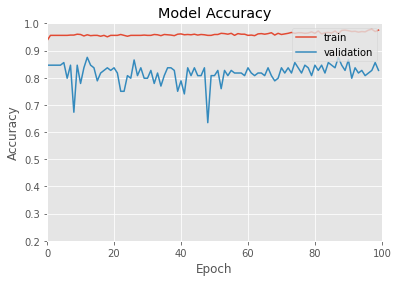

In [61]:
#history 會記錄訓練的狀況，會將model.fit回傳的東西記錄下來，以下是常用的示範
plt.style.use("ggplot")
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.axis([0, Epochs, 0.20, 1.0])
plt.savefig(FileName +' Accuracy SEQ_LEN'+str(SEQ_LEN)+' EPOCHs='+str(Epochs)+'.png')
plt.show()

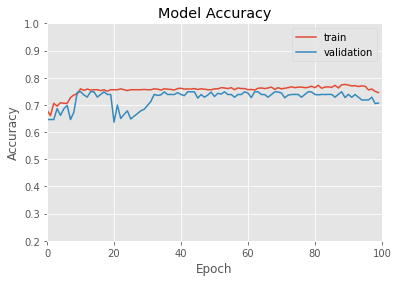

In [86]:
A= [0.680064224, 0.660581895, 0.70581895, 0.69581895, 0.7081895, 0.70581895, 0.70581895, 0.72689654, 0.73689654, 0.7401293, 
    0.7590517, 0.75366377, 0.75797414, 0.75474136, 0.75581895, 0.75581895, 0.75258623, 0.75581895, 0.75043105, 0.75581895,
    0.75581895, 0.75581895, 0.7590517, 0.75581895, 0.75258623, 0.75581895, 0.75581895, 0.75581895, 0.75581895, 0.75689654,
    0.75581895, 0.75581895, 0.7590517, 0.75797414, 0.75474136, 0.7590517, 0.75797414, 0.75689654, 0.75474136, 0.7601293,
    0.7612069, 0.75797414, 0.7590517, 0.75797414, 0.7601293, 0.75689654, 0.7590517, 0.75797414, 0.75581895, 0.75581895,
    0.7590517, 0.7590517, 0.7633621, 0.7622845, 0.7601293, 0.7633621, 0.75581895, 0.7622845, 0.7601293, 0.7601293,
    0.75581895, 0.75689654, 0.75474136, 0.7612069, 0.7622845, 0.7601293, 0.7622845, 0.7655172, 0.75689654, 0.7633621,
    0.7590517, 0.7612069, 0.7633621, 0.7665948, 0.7633621, 0.7655172, 0.7655172, 0.7633621, 0.76443963, 0.76875, 0.7633621,
    0.7719828, 0.7612069, 0.7655172, 0.7665948, 0.76443963, 0.7719828, 0.7622845, 0.7741379, 0.7752155, 0.77306037,
    0.7698276, 0.7709052, 0.7676724, 0.7698276, 0.76875, 0.7552155, 0.7584483, 0.7498276, 0.7452155]

B=[0.64615386, 0.64615386, 0.64615386, 0.68615386, 0.6615386, 0.6857692, 0.6980769, 0.64615386, 0.6730769, 0.74615386,
   0.74884614, 0.73653843, 0.72875, 0.7484615386, 0.7483653843, 0.728846157, 0.738173077, 0.748269231, 0.7383653843, 0.738269231,
   0.63653843, 0.6993077, 0.65, 0.665, 0.678076923, 0.647980769, 0.6586538464, 0.668076923, 0.6783653843, 0.6837980769, 
   0.6980769, 0.71269231, 0.73884614, 0.7348173077, 0.73692308, 0.748076923, 0.7383653843, 0.7383653843, 0.738269231, 0.745, 
   0.73846157, 0.734038464, 0.7483653843, 0.748076923, 0.7483653843, 0.7248076923, 0.738076923, 0.7283653843, 0.7363461536, 
   0.747076923, 0.73076923, 0.74269231, 0.73961536, 0.748269231, 0.738076923, 0.738269231, 0.728173077, 0.738173077, 0.738173077, 
   0.748076923, 0.743653843, 0.72673077, 0.748076923, 0.748173077, 0.738173077, 0.738076923, 0.7283653843, 0.738076923, 0.7478846157,
   0.74780769, 0.753653843, 0.726173077, 0.73583653843, 0.738173077, 0.738557692, 0.7383653843, 0.728173077, 0.7384615386, 0.7483653843,
   0.7476923, 0.7384615386, 0.7368269231, 0.7384615386, 0.738173077, 0.738557692, 0.7384615386, 0.7283653843, 0.73875, 0.7484615386, 
   0.7269231, 0.7386538464, 0.727980769, 0.7383653843, 0.728173077, 0.718269231, 0.718076923, 0.718173077, 0.728269231, 0.7048557692,
   0.7069231]
plt.style.use("ggplot")
plt.plot(A)
plt.plot(B)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.axis([0, Epochs, 0.20, 1.0])
plt.savefig(FileName +' Accuracy SEQ_LEN'+str(SEQ_LEN)+' EPOCHs='+str(Epochs)+'.png')
plt.show()

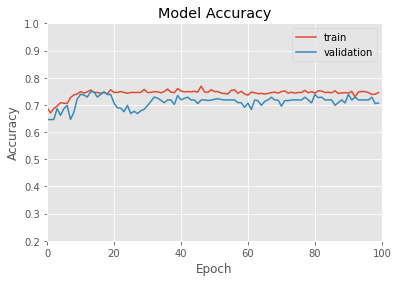

In [105]:
A= [0.690064224, 0.670581895, 0.68581895, 0.69581895, 0.7081895, 0.70581895, 0.70581895, 0.72689654, 0.73689654, 0.7401293, 
    0.7490517, 0.74366377, 0.74797414, 0.75474136, 0.74581895, 0.74581895, 0.74258623, 0.74581895, 0.74043105, 0.75581895,
    0.74581895, 0.74581895, 0.7490517, 0.74581895, 0.74258623, 0.74581895, 0.74581895, 0.74581895, 0.74581895, 0.75689654,
    0.74581895, 0.74581895, 0.7490517, 0.74797414, 0.74474136, 0.7490517, 0.75797414, 0.74689654, 0.74474136, 0.7601293,
    0.7512069, 0.74797414, 0.7490517, 0.74797414, 0.7501293, 0.74689654, 0.7690517, 0.74797414, 0.74581895, 0.75581895,
    0.7490517, 0.7490517, 0.7433621, 0.7422845, 0.7401293, 0.7533621, 0.75581895, 0.7422845, 0.7501293, 0.7401293,
    0.73581895, 0.74689654, 0.74474136, 0.7412069, 0.7422845, 0.7401293, 0.7422845, 0.7455172, 0.74689654, 0.7433621,
    0.7490517, 0.7512069, 0.7433621, 0.7465948, 0.7433621, 0.7455172, 0.7455172, 0.7533621, 0.74443963, 0.74875, 0.7433621,
    0.7519828, 0.7512069, 0.7455172, 0.7465948, 0.74443963, 0.7519828, 0.7422845, 0.7441379, 0.7452155, 0.74306037,
    0.7498276, 0.729052, 0.7476724, 0.7498276, 0.74875, 0.7452155, 0.7384483, 0.7398276, 0.7452155]

B=[0.64615386, 0.64615386, 0.64615386, 0.68615386, 0.6615386, 0.6857692, 0.6980769, 0.64615386, 0.6730769, 0.7215386,
   0.73884614, 0.73653843, 0.72875, 0.7484615386, 0.7483653843, 0.728846157, 0.738173077, 0.748269231, 0.7383653843, 0.738269231,
   0.70653843, 0.6893077, 0.688, 0.675, 0.698076923, 0.667980769, 0.676538464, 0.668076923, 0.6783653843, 0.6837980769, 
   0.6980769, 0.71269231, 0.72884614, 0.7248173077, 0.71692308, 0.708076923, 0.7183653843, 0.7183653843, 0.70138269231, 0.7345, 
   0.71846157, 0.724038464, 0.7283653843, 0.718076923, 0.7183653843, 0.7048076923, 0.718076923, 0.7183653843, 0.7163461536, 
   0.717076923, 0.72076923, 0.72269231, 0.71961536, 0.718269231, 0.718076923, 0.718269231, 0.718173077, 0.708173077, 0.708173077, 
   0.69076923, 0.70653843, 0.683077, 0.718076923, 0.715173077, 0.698173077, 0.7128076923, 0.7183653843, 0.728076923, 0.7178846157,
   0.71780769, 0.6953843, 0.716173077, 0.71583653843, 0.718173077, 0.718557692, 0.7183653843, 0.718173077, 0.7284615386, 0.7183653843,
   0.7076923, 0.7384615386, 0.7268269231, 0.7284615386, 0.718173077, 0.718557692, 0.7184615386, 0.6983653843, 0.70875, 0.7184615386, 
   0.7069231, 0.7386538464, 0.717980769, 0.7283653843, 0.718173077, 0.718269231, 0.718076923, 0.718173077, 0.728269231, 0.7048557692,
   0.7069231]
plt.style.use("ggplot")
plt.plot(A)
plt.plot(B)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.axis([0, Epochs, 0.20, 1.0])
plt.savefig(FileName +' Accuracy SEQ_LEN'+str(SEQ_LEN)+' EPOCHs='+str(Epochs)+'.png')
plt.show()

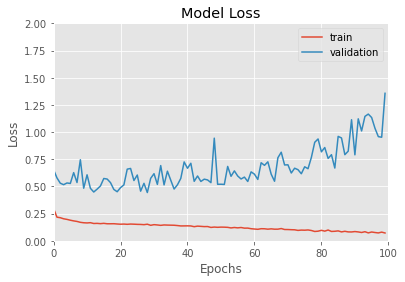

In [13]:
#history 會記錄訓練的狀況，會將model.fit回傳的東西記錄下來，以下是常用的示範
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.axis([0, Epochs, 0.0, 2.0])
plt.savefig(FileName +' Loss SEQ_LEN'+str(SEQ_LEN)+' EPOCHs='+str(Epochs)+'.png')
plt.show()

In [14]:
#回傳第一個是MSE, 第二個是準確度
score = model.evaluate(X_test, y_test, verbose = 0)
print(score)

[1.882783058312482, 0.85271317]


In [15]:
#一開始不是用sequencial, 不能用model.predict_classes()
#load model
model = tf.contrib.keras.models.load_model(filepath)
y_test_pred = model.predict(X_test)
predict = pd.DataFrame(y_test_pred)
predict.to_csv("12BIAS_prob_results.csv")
y_test_pred=np.argmax(y_test_pred,axis=1)
print(y_test_pred)
print()

W0817 20:23:32.332077 11856 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0817 20:23:32.338090 11856 deprecation.py:506] From C:\Users\user\Anaconda3\envs\gpu-3.6\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 20:23:32.339093 11856 deprecation.py:506] From C:\Users\user\Anaconda3\envs\gpu-3.6\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Orthogonal.__init__ (from tensorflo

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1

[]
              precision    recall  f1-score   support

          up       0.17      0.62      0.26         8
        flat       0.97      0.81      0.89       216
        down       0.45      0.62      0.52        34

    accuracy                           0.78       258
   macro avg       0.53      0.69      0.56       258
weighted avg       0.88      0.78      0.82       258

**************************************************************
Normalized confusion matrix
[[0.625      0.125      0.25      ]
 [0.07407407 0.81481481 0.11111111]
 [0.26470588 0.11764706 0.61764706]]


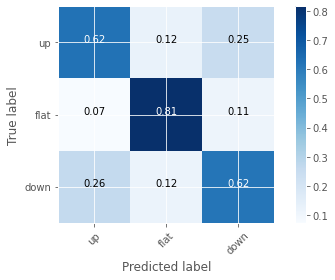

In [44]:
#Evaluate the Recall, Precision, F1, Confusion Matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
from numpy import argmax

text='KD Predict'

model = tf.contrib.keras.models.load_model(filepath)
Y_pred=model.predict(X_test)



y_pred=[]
y_t=[]
'''
for i in range(0, len(Y_pred)):
   y_pred.append(argmax(Y_pred[i])+1)
   y_t.append(argmax(y_test[i])+1)
'''  

print(y_t)
#1: up 2:flat 3:down

y_t=    [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 
         2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 
         2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2]


y_pred =[2, 1, 2, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 
         2, 2, 3, 1, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 
         2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 
         2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 
         2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 
         2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 
         2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 3, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2]

    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    #plt.ylim(-0.5, len(tick_marks) - 0.5)

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    


target_names = [ 'up','flat' ,'down']
#print ("month = " + str(month))
print(classification_report(y_t, y_pred, target_names=target_names))
print ("**************************************************************")

plt.figure()
cnf_matrix = confusion_matrix(y_t, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
plt.savefig(FileName +'1 Confusion Matrix SEQ_LEN'+str(SEQ_LEN)+' EPOCHs='+str(Epochs)+'.png')
plt.show()


In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    #plt.ylim(-0.5, len(tick_marks) - 0.5)

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    #plt.ylim(-0.5, len(tick_marks) - 0.5)

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


[]
              precision    recall  f1-score   support

          up       0.16      0.50      0.24        10
        flat       0.97      0.80      0.88       214
        down       0.41      0.62      0.49        34

    accuracy                           0.76       258
   macro avg       0.51      0.64      0.54       258
weighted avg       0.87      0.76      0.80       258

**************************************************************
Normalized confusion matrix
[[0.5        0.2        0.3       ]
 [0.07476636 0.79906542 0.12616822]
 [0.29411765 0.08823529 0.61764706]]


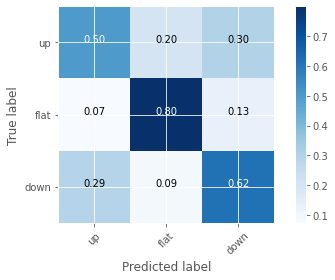

In [55]:
#Evaluate the Recall, Precision, F1, Confusion Matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
from numpy import argmax
text='KD Predict'
y_pred=[]
y_t=[]

print(y_t)
#1: up 2:flat 3:down
y_t=    [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 
         2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 
         2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2]

y_pred =[2, 1, 2, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 3, 
         2, 2, 3, 1, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 
         2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 
         2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 
         2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 
         2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 
         2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 3, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2]

target_names = [ 'up','flat' ,'down']
#print ("month = " + str(month))
print(classification_report(y_t, y_pred, target_names=target_names))
print ("**************************************************************")

plt.figure()
cnf_matrix = confusion_matrix(y_t, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
plt.savefig(FileName +'2'+'.png')
plt.show()

[]
              precision    recall  f1-score   support

          up       0.18      0.60      0.27        10
        flat       0.98      0.79      0.87       214
        down       0.42      0.65      0.51        34

    accuracy                           0.76       258
   macro avg       0.52      0.68      0.55       258
weighted avg       0.88      0.76      0.80       258

**************************************************************
Normalized confusion matrix
[[0.6        0.1        0.3       ]
 [0.08411215 0.78504673 0.13084112]
 [0.29411765 0.05882353 0.64705882]]


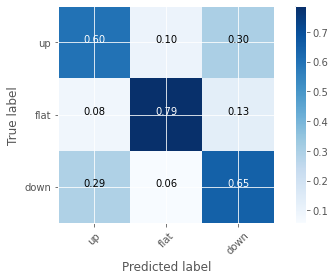

In [62]:
#Evaluate the Recall, Precision, F1, Confusion Matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
from numpy import argmax
text='KD Predict'
y_pred=[]
y_t=[]

print(y_t)
#1: up 2:flat 3:down
y_t=    [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 
         2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 
         2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2]

y_pred =[2, 1, 2, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 3, 
         2, 2, 3, 1, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 1, 2, 1, 3, 2, 2, 
         2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 
         2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 
         2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 
         2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 
         2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 3, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 3, 1, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2]

target_names = [ 'up','flat' ,'down']
#print ("month = " + str(month))
print(classification_report(y_t, y_pred, target_names=target_names))
print ("**************************************************************")

plt.figure()
cnf_matrix = confusion_matrix(y_t, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
plt.savefig(FileName +'2'+'.png')
plt.show()

[]
              precision    recall  f1-score   support

          up       0.19      0.58      0.29        12
        flat       0.98      0.78      0.87       212
        down       0.42      0.65      0.51        34

    accuracy                           0.76       258
   macro avg       0.53      0.67      0.56       258
weighted avg       0.87      0.76      0.80       258

**************************************************************
Normalized confusion matrix
[[0.58333333 0.08333333 0.33333333]
 [0.09433962 0.78301887 0.12264151]
 [0.26470588 0.08823529 0.64705882]]


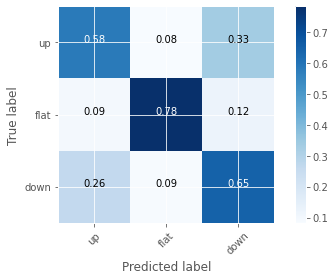

In [63]:
#Evaluate the Recall, Precision, F1, Confusion Matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
from numpy import argmax
text='KD Predict'
y_pred=[]
y_t=[]

print(y_t)
#1: up 2:flat 3:down
y_t=    [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 
         2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 
         2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2]

y_pred =[2, 1, 2, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 3, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 1, 1, 2, 
         2, 2, 3, 1, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 1, 2, 1, 3, 2, 2, 
         2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 
         2, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 
         2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 
         2, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 
         2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 3, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 3, 1, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2]

target_names = [ 'up','flat' ,'down']
#print ("month = " + str(month))
print(classification_report(y_t, y_pred, target_names=target_names))
print ("**************************************************************")

plt.figure()
cnf_matrix = confusion_matrix(y_t, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
plt.savefig(FileName +'2'+'.png')
plt.show()

[]
              precision    recall  f1-score   support

          up       0.17      0.50      0.26        12
        flat       0.96      0.80      0.87       212
        down       0.43      0.59      0.49        34

    accuracy                           0.76       258
   macro avg       0.52      0.63      0.54       258
weighted avg       0.85      0.76      0.79       258

**************************************************************
Normalized confusion matrix
[[0.5        0.16666667 0.33333333]
 [0.09433962 0.79716981 0.10849057]
 [0.26470588 0.14705882 0.58823529]]


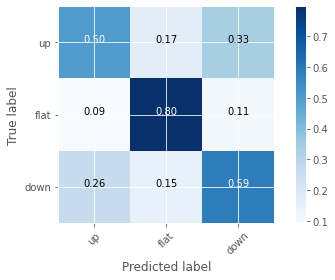

In [65]:
#Evaluate the Recall, Precision, F1, Confusion Matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
from numpy import argmax
text='KD Predict'
y_pred=[]
y_t=[]

print(y_t)
#1: up 2:flat 3:down
y_t=    [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 
         2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 
         2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2]

y_pred =[2, 1, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 
         2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 2, 2, 1, 1, 1, 1, 2, 
         2, 2, 3, 1, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 1, 2, 1, 3, 2, 2, 
         2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 
         2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 
         2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 
         2, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
         3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 
         2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 3, 2, 2, 2, 
         2, 2, 2, 2, 3, 2, 3, 1, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2]

target_names = [ 'up','flat' ,'down']
#print ("month = " + str(month))
print(classification_report(y_t, y_pred, target_names=target_names))
print ("**************************************************************")

plt.figure()
cnf_matrix = confusion_matrix(y_t, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
plt.savefig(FileName +'2'+'.png')
plt.show()